<a href="https://colab.research.google.com/github/ipediz/BachehayekhafaneTMU/blob/main/Double_Roboust_and_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn
!pip install matplotlib
!pip install seaborn
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
%matplotlib inline

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
Data = pd.read_csv(r'All_STATE_CASUAL_READY_2.csv')

In [ ]:
Data['Treatment'] = Data['Treatment'].replace({1: True, 0: False})

In [ ]:
from tabulate import tabulate
#dropping non-relative variables for summary statistics table
columns_to_drop = [
    'relative_time_m8andbeyond', 'relative_time_m7', 'relative_time_m6', 'relative_time_m5',
    'relative_time_m4', 'relative_time_m3', 'relative_time_m2', 'relative_time_m1', 'relative_time_0',
    'relative_time_p1', 'relative_time_p2', 'relative_time_p3', 'relative_time_p4',
    'relative_time_p5', 'relative_time_p6', 'relative_time_p7', 'relative_time_p8andbeyond',
    'cem_strata', 'cem_weights', 'nonbusiness_bankruptcy_percapita','business_bankruptcy_percapita', 'log_bankruptcy'
]

# Create a new dataframe without the specified columns



# Create a new dataframe without the specified columns
Data1= Data.drop(columns=columns_to_drop)
Data1 = Data1.dropna();

In [ ]:
Data1.sample(1240, random_state=5)

,county_code,new_timeperiod,lending_club_available,bankruptcy_per_capita,population_estimation,employed_individuals,monthly_earnings,labor_force,medianhouseholdincome,percent_over_60,interaction,Treatment
51082,48147,11,1,0.442321,33.911999,5.080000,2.682,15.341000,40.890999,0.144175,0.144175,False
12323,19053,4,0,0.853554,8.201000,1.867000,2.250,4.273000,33.938999,0.217993,0.000000,False
41415,40059,4,0,0.295421,3.385000,1.055000,2.632,2.044000,45.071999,0.164879,0.000000,False
33868,35043,17,1,0.856740,135.397000,27.462000,4.391,60.551998,57.375999,0.362775,0.362775,True
4316,8025,5,1,0.312354,6.403000,0.982000,2.447,1.987000,29.104000,0.287748,0.287748,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8916,16081,13,0,0.883913,10.182000,1.882000,2.377,5.325000,51.561001,0.181294,0.000000,False
14786,20037,3,0,0.488796,38.870998,14.267000,2.353,19.905001,37.289001,0.151482,0.000000,False
64420,56029,21,1,0.376236,29.237000,10.815000,3.208,15.861000,50.966999,0.217630,0.217630,False
51162,48153,7,1,0.308928,6.474000,1.374000,2.480,3.221000,31.400999,0.179503,0.179503,False


In [ ]:
Data1.groupby(['new_timeperiod','county_code', 'Treatment']).mean()

lending_club_available  \
new_timeperiod county_code Treatment                           
1              1019        False                         0.0   
               1023        False                         0.0   
               1029        False                         0.0   
               1039        False                         0.0   
               1049        False                         0.0   
...                                                      ...   
28             55133       True                          1.0   
               55135       False                         1.0   
               55137       False                         1.0   
               55139       False                         1.0   
               55141       True                          1.0   

                                      bankruptcy_per_capita  \
new_timeperiod county_code Treatment                          
1              1019        False                   1.351739   
               1023        False                   0.639068   
               1029        False                   0.814332   
               1039        False                   1.009660   
               1049        False                   0.711238   
...                                                     ...   
28             55133       True                    0.662729   
               55135       False                   0.422362   
               55137       False                   0.661896   
               55139       False                   0.848861   
               55141       True                    0.421213   

                                      population_estimation  \
new_timeperiod county_code Treatment                          
1              1019        False                  24.413000   
               1023        False                  14.083000   
               1029        False                  14.736000   
               1039        False                  36.646000   
               1049        False                  68.893997   
...                                                     ...   
28             55133       True                  395.334990   
               55135       False                  52.088001   
               55137       False                  24.173000   
               55139       False                 169.639010   
               55141       True                   73.597000   

                                      employed_individuals  monthly_earnings  \
new_timeperiod county_code Treatment                                           
1              1019        False                  4.324000             2.365   
               1023        False                  3.120000             3.841   
               1029        False                  2.101000             2.651   
               1039        False                 11.893000             2.513   
               1049        False                 20.101000             2.475   
...                                                    ...               ...   
28             55133       True                 220.761990             4.617   
               55135       False                 17.676001             3.395   
               55137       False                  5.129000             3.078   
               55139       False                 82.345001             4.381   
               55141       True                  34.132000             3.879   

                                      labor_force  medianhouseholdincome  \
new_timeperiod county_code Treatment                                       
1              1019        False        11.996000              38.028000   
               1023        False         5.069000              30.728001   
               1029        False         6.557000              37.742001   
               1039        False        16.799999              33.772999   
               1049        False        30.681999              35.37

In [ ]:
def doubly_robust(df, X, T, Y):
    # Fit propensity score model
    ps = LogisticRegression(C=1e6, max_iter=1000).fit(df[X], df[T]).predict_proba(df[X])[:, 1]

    # Fit outcome models for treated (mu1) and untreated (mu0)
    mu0 = LinearRegression().fit(df[df[T] == 0][X], df[df[T] == 0][Y]).predict(df[X])
    mu1 = LinearRegression().fit(df[df[T] == 1][X], df[df[T] == 1][Y]).predict(df[X])

    # Compute doubly robust treatment effect
    treatment_effect = (
        np.mean(df[T] * (df[Y] - mu1) / ps + mu1) -
        np.mean((1 - df[T]) * (df[Y] - mu0) / (1 - ps) + mu0)
    )

    return treatment_effect

# Define variables
T = "Treatment"
Y = "bankruptcy_per_capita"
X = ["population_estimation", "monthly_earnings", "medianhouseholdincome",
     "employed_individuals", "labor_force"]

# Call the function
effect = doubly_robust(Data1, X, T, Y)
print("Doubly Robust Treatment Effect:", effect)

Doubly Robust Treatment Effect: -0.004645831081117602


In [ ]:
from joblib import Parallel, delayed # for parallel processing
np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(doubly_robust)
(Data1.sample(frac=1, replace=True), X, T, Y)
for _ in range(bootstrap_sample))
ates = np.array(ates)
print(f"ATE 95% CI:", (np.percentile(ates, 2.5), np.percentile(ates,
97.5)))

ATE 95% CI: (-0.010915207979526564, 0.00215575294820087)


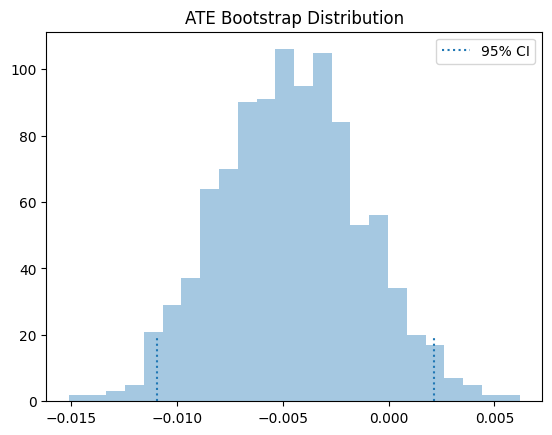

In [ ]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 20, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 20, linestyles="dotted",
label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

In [ ]:


def doubly_robust_wrong_ps(df, X, T, Y):
    # Generate wrong propensity scores randomly
    np.random.seed(654)
    ps = np.random.uniform(0.1, 0.9, df.shape[0])

    # Fit outcome models for treated (mu1) and untreated (mu0)
    mu0 = LinearRegression().fit(df[df[T] == 0][X], df[df[T] == 0][Y]).predict(df[X])
    mu1 = LinearRegression().fit(df[df[T] == 1][X], df[df[T] == 1][Y]).predict(df[X])

    # Compute doubly robust treatment effect using the wrong propensity scores
    treatment_effect = (
        np.mean(df[T] * (df[Y] - mu1) / ps + mu1) -
        np.mean((1 - df[T]) * (df[Y] - mu0) / (1 - ps) + mu0)
    )

    return treatment_effect

# Define variables
T = "Treatment"
Y = "bankruptcy_per_capita"
X = ["population_estimation", "monthly_earnings", "medianhouseholdincome",
     "employed_individuals", "labor_force"]

# Call the function
effect_wrong_ps = doubly_robust_wrong_ps(Data1, X, T, Y)
print("Doubly Robust Treatment Effect with Wrong PS:", effect_wrong_ps)


Doubly Robust Treatment Effect with Wrong PS: -0.005553727798308095


In [ ]:
import numpy as np
from joblib import Parallel, delayed

# Set random seed for reproducibility
np.random.seed(88)

# Number of bootstrap samples
bootstrap_sample = 1000

# Define a parallelized function for bootstrap resampling
parallel_fn = delayed(doubly_robust_wrong_ps)
wrong_ps = Parallel(n_jobs=4)(
    parallel_fn(Data1.sample(frac=1, replace=True), X, T, Y)
    for _ in range(bootstrap_sample)
)

# Convert results to a numpy array
wrong_ps = np.array(wrong_ps)

# Compute confidence intervals
print(f"Wrong PS ATE 95% CI:", (np.percentile(wrong_ps, 2.5), np.percentile(wrong_ps, 97.5)))
print(f"Original ATE 95% CI:", (np.percentile(ates, 2.5), np.percentile(ates, 97.5)))

Wrong PS ATE 95% CI: (-0.012806204818257375, 0.004431006761189435)
Original ATE 95% CI: (-0.010915207979526564, 0.00215575294820087)


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

def doubly_robust_wrong_model(df, X, T, Y):
    # Fit propensity score model
    ps = LogisticRegression(C=1e6, max_iter=1000).fit(df[X], df[T]).predict_proba(df[X])[:, 1]

    # Simulate wrong outcome models (mu0 and mu1 as random noise)
    np.random.seed(654)
    mu0 = np.random.normal(0, 1, df.shape[0])
    mu1 = np.random.normal(0, 1, df.shape[0])

    # Compute doubly robust treatment effect with incorrect mu models
    wrong_treatment_effect = (
        np.mean(df[T] * (df[Y] - mu1) / ps + mu1) -
        np.mean((1 - df[T]) * (df[Y] - mu0) / (1 - ps) + mu0)
    )

    return wrong_treatment_effect


In [ ]:
doubly_robust_wrong_model(Data1, X, T, Y)

0.004027811180204344

In [ ]:
import numpy as np
from joblib import Parallel, delayed

# Set random seed for reproducibility
np.random.seed(88)

# Number of bootstrap samples
bootstrap_sample = 1000

# Define a parallelized function for bootstrap resampling
parallel_fn = delayed(doubly_robust_wrong_model)

# Execute parallel bootstrap resampling
wrong_mux = Parallel(n_jobs=4)(
    parallel_fn(Data1.sample(frac=1, replace=True), X, T, Y)
    for _ in range(bootstrap_sample)
)

# Convert results to a numpy array
wrong_mux = np.array(wrong_mux)

# Compute 95% confidence interval
print(f"Wrong Mu ATE 95% CI:", (np.percentile(wrong_mux, 2.5), np.percentile(wrong_mux, 97.5)))
print(f"Original ATE 95% CI:", (np.percentile(ates, 2.5),
np.percentile(ates, 97.5)))

Wrong Mu ATE 95% CI: (-0.018906968258774342, 0.009240566822358718)
Original ATE 95% CI: (-0.010915207979526564, 0.00215575294820087)


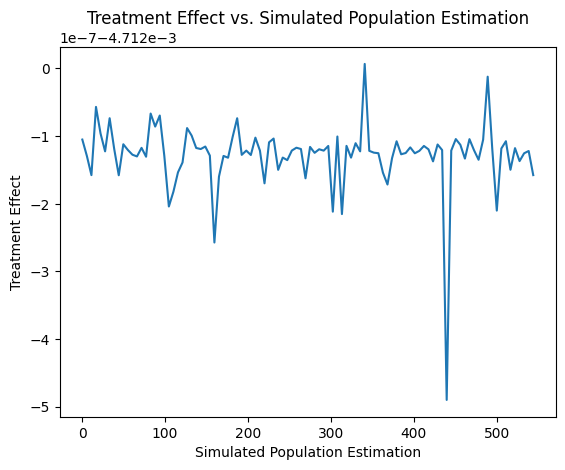

In [ ]:
# Simulate a covariate (e.g., population_estimation) and analyze its impact
def simulate_population_and_analyze(df, T, Y, X, sim_var="population_estimation"):
    simulated_values = np.linspace(df[sim_var].min(), df[sim_var].max(), 100)
    treatment_effects = []

    for val in simulated_values:
        df_sim = df.copy()
        df_sim[sim_var] = val  # Simulate this variable to be constant
        effect = doubly_robust(df_sim, X, T, Y)
        treatment_effects.append(effect)

    return simulated_values, treatment_effects

# Run simulation and plot
simulated_values, treatment_effects = simulate_population_and_analyze(Data1, T, Y, X)

plt.plot(simulated_values, treatment_effects)
plt.xlabel("Simulated Population Estimation")
plt.ylabel("Treatment Effect")
plt.title("Treatment Effect vs. Simulated Population Estimation")
plt.show()


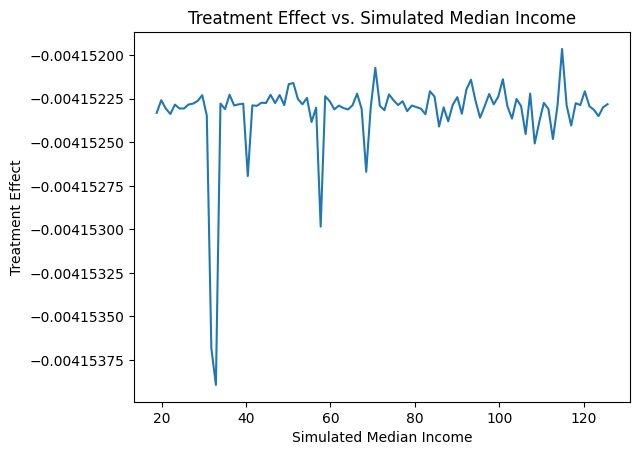

In [ ]:
# Simulate a covariate (e.g., population_estimation) and analyze its impact
def simulate_population_and_analyze(df, T, Y, X, sim_var="medianhouseholdincome"):
    simulated_values = np.linspace(df[sim_var].min(), df[sim_var].max(), 100)
    treatment_effects = []

    for val in simulated_values:
        df_sim = df.copy()
        df_sim[sim_var] = val  # Simulate this variable to be constant
        effect = doubly_robust(df_sim, X, T, Y)
        treatment_effects.append(effect)

    return simulated_values, treatment_effects

# Run simulation and plot
simulated_values, treatment_effects = simulate_population_and_analyze(Data1, T, Y, X)

plt.plot(simulated_values, treatment_effects)
plt.xlabel("Simulated Median Income")
plt.ylabel("Treatment Effect")
plt.title("Treatment Effect vs. Simulated Median Income")
plt.show()


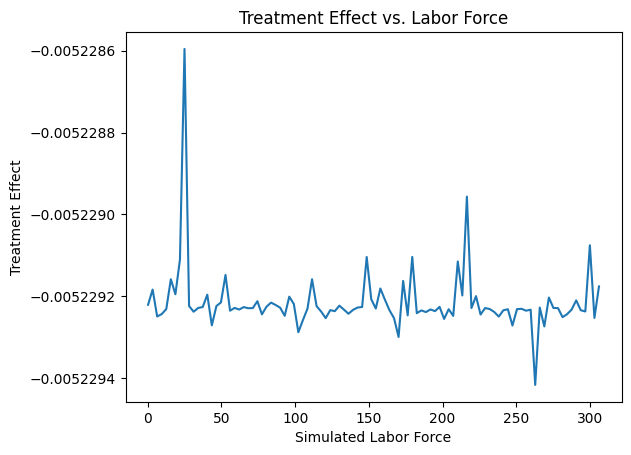

In [ ]:
# Simulate a covariate (e.g., population_estimation) and analyze its impact
def simulate_population_and_analyze(df, T, Y, X, sim_var="labor_force"):
    simulated_values = np.linspace(df[sim_var].min(), df[sim_var].max(), 100)
    treatment_effects = []

    for val in simulated_values:
        df_sim = df.copy()
        df_sim[sim_var] = val  # Simulate this variable to be constant
        effect = doubly_robust(df_sim, X, T, Y)
        treatment_effects.append(effect)

    return simulated_values, treatment_effects

# Run simulation and plot
simulated_values, treatment_effects = simulate_population_and_analyze(Data1, T, Y, X)

plt.plot(simulated_values, treatment_effects)
plt.xlabel("Simulated Labor Force")
plt.ylabel("Treatment Effect")
plt.title("Treatment Effect vs. Labor Force")
plt.show()
